<a href="https://colab.research.google.com/github/DataSquirrel99/EDA/blob/main/SpotifyEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify 2023 EDA: Insights into Song Popularity and Audio Features**

## **1. Introduction**

## **Project Goal:**

### This project focuses on performing Exploratory Data Analysis (EDA) on the Spotify 2023 dataset. The dataset contains a range of features about individual songs, such as tempo, energy, danceability, popularity, and release date, among others. By exploring and visualizing these features, we aim to uncover patterns and trends that can help us understand the characteristics that make certain songs more popular

## **Data Source:**

### The dataset "spotify-2023.csv" is from Kaggle.
###The dataset attributes include track_name,	artist(s)_name, artist_count,	released_year,	released_month,	released_day,	in_spotify_playlists,	in_spotify_charts,	streams,	in_apple_playlists, in_apple_charts,	in_deezer_playlists, in_deezer_charts, in_shazam_charts,	bpm,	key,	mode,	danceability_%,	valence_%,	energy_%,	acousticness_%,	instrumentalness_%,	liveness_%,	speechiness_%.

## **2. Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Data loading and Data cleaning**

In [3]:
spotify=pd.read_csv("/content/sample_data/spotify-2023.csv", encoding="latin1")
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
spotify.shape

(953, 24)

In [ ]:
spotify.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [4]:
#filling the missing data with mode
spotify['in_shazam_charts'].fillna(spotify.in_shazam_charts.mode()[0], inplace=True)
spotify['key'].fillna(spotify.key.mode()[0], inplace=True)

<ipython-input-4-4affe1b50c0d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify['in_shazam_charts'].fillna(spotify.in_shazam_charts.mode()[0], inplace=True)
<ipython-input-4-4affe1b50c0d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [ ]:
s_selected=spotify[['in_deezer_playlists', 'in_shazam_charts']]
s_selected.sort_values('in_shazam_charts', ascending=False)

,in_deezer_playlists,in_shazam_charts
197,21,99
871,"6,720",99
26,318,96
8,48,953
653,"5,451",953
...,...,...
518,150,0
517,9,0
515,14,0
514,7,0


In [5]:
spotify['in_deezer_playlists'] =spotify['in_deezer_playlists'].str.replace(',','').astype(int)
spotify['in_shazam_charts'] =spotify['in_shazam_charts'].str.replace(',','').astype(int)

In [6]:
spotify['streams'] =pd.to_numeric(spotify['streams'], errors='coerce')

In [7]:
spotify['streams'].fillna(0, inplace=True)

<ipython-input-7-57faa2e78349>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify['streams'].fillna(0, inplace=True)


In [8]:
spotify['streams'] =spotify['streams'].astype(int)

In [9]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

## **4. Data Analysis**

In [ ]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139e+00,8.930442e-01,1.0,1.0,1.0,2.0,8.000000e+00
released_year,953.0,2.018238e+03,1.111622e+01,1930.0,2020.0,2022.0,2022.0,2.023000e+03
released_month,953.0,6.033578e+00,3.566435e+00,1.0,3.0,6.0,9.0,1.200000e+01
released_day,953.0,1.393075e+01,9.201949e+00,1.0,6.0,13.0,22.0,3.100000e+01
in_spotify_playlists,953.0,5.200125e+03,7.897609e+03,31.0,875.0,2224.0,5542.0,5.289800e+04
in_spotify_charts,953.0,1.200944e+01,1.957599e+01,0.0,0.0,3.0,16.0,1.470000e+02
streams,953.0,5.135979e+08,5.668039e+08,0.0,141381703.0,290228626.0,673801126.0,3.703895e+09
in_apple_playlists,953.0,6.781217e+01,8.644149e+01,0.0,13.0,34.0,88.0,6.720000e+02
in_apple_charts,953.0,5.190871e+01,5.063024e+01,0.0,7.0,38.0,87.0,2.750000e+02
in_deezer_playlists,953.0,3.851878e+02,1.130536e+03,0.0,13.0,44.0,164.0,1.236700e+04


In [ ]:
#number of songs from each artists
spotify['artist(s)_name'].value_counts()

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17
...,...
"Karol G, Ovy On The Drums",1
"Coolio, L.V.",1
Kordhell,1


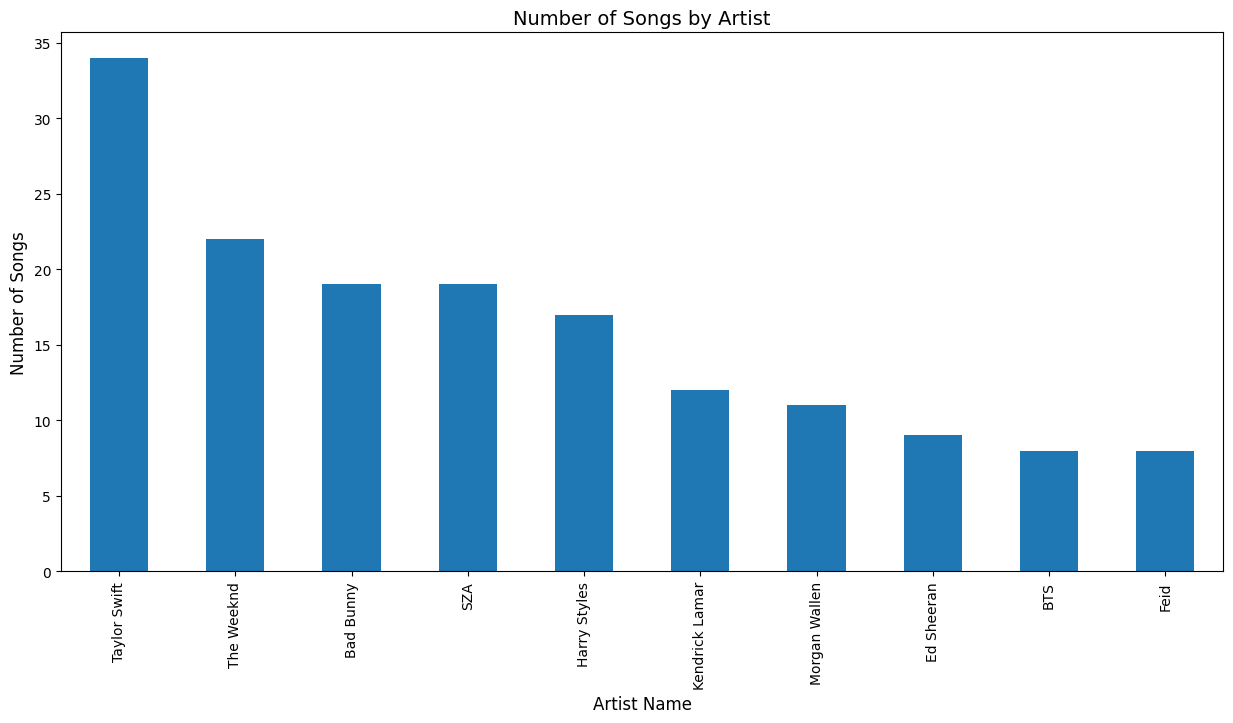

In [ ]:
spotify['artist(s)_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Number of Songs by Artist', fontsize=14)
plt.show()

In [ ]:
#most to least streamed artists
spotify.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)

,streams
artist(s)_name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
...,...
"Mc Pedrinho, DJ 900",11956641
"Sog, Ryan Castro, Peso Pluma",11599388
"Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vishal-Shekhar, Shekhar Ravjiani, Kumaar",1365184


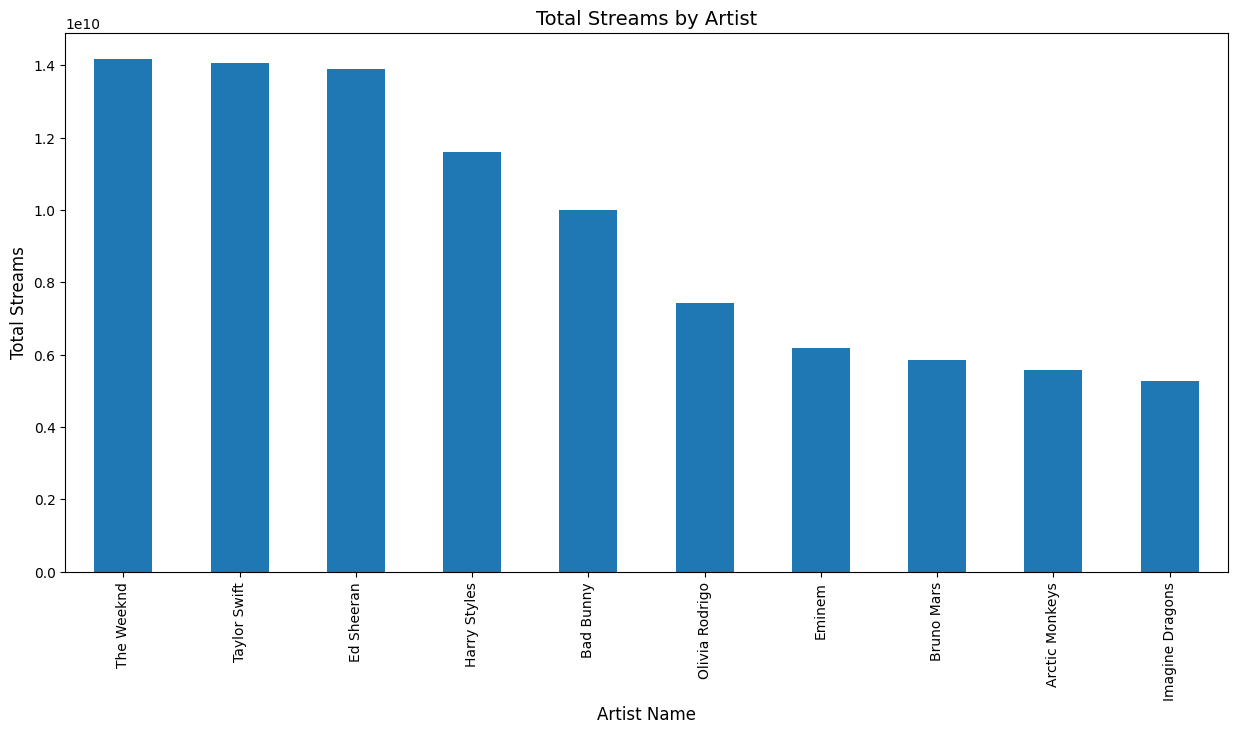

In [ ]:
spotify.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Total Streams', fontsize=12)
plt.title('Total Streams by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()

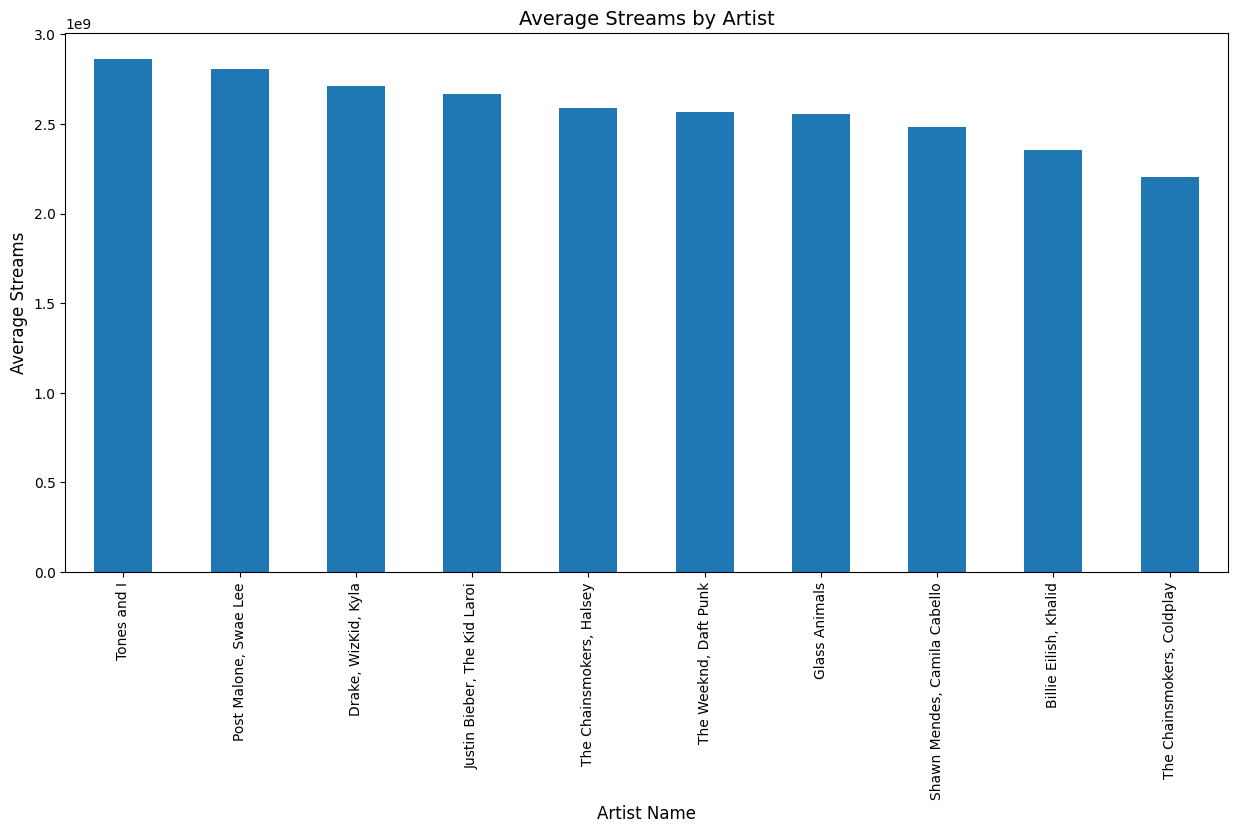

In [ ]:
spotify.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Average Streams', fontsize=12)
plt.title('Average Streams by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [ ]:
spotify['released_year'].value_counts().head()

,count
released_year,
2022,402
2023,175
2021,119
2020,37
2019,36


In [ ]:
spotify.groupby('artist(s)_name')[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum().sort_values(by=['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'], ascending=False).head(10)

,in_spotify_playlists,in_deezer_playlists,in_apple_playlists
artist(s)_name,,,
The Weeknd,144053,7551,1677
Taylor Swift,132974,3086,1796
Ed Sheeran,128758,16952,1448
Harry Styles,110026,3695,1741
Eminem,87331,15121,475
Arctic Monkeys,84016,4992,241
Coldplay,75716,12727,381
Avicii,68241,7566,407
"Dr. Dre, Snoop Dogg",65728,12042,283


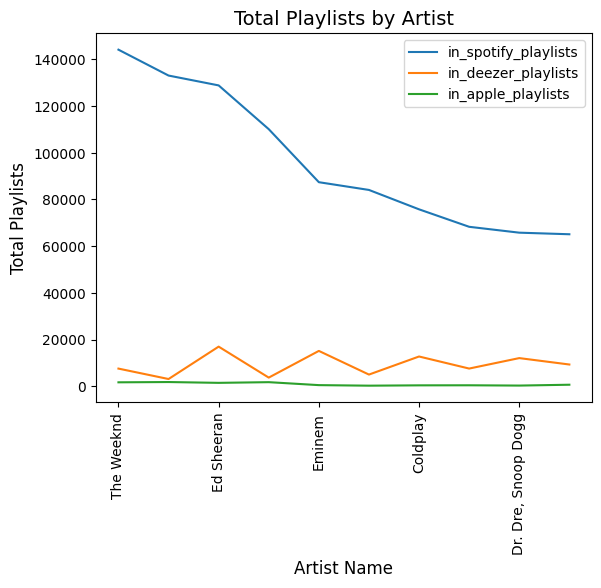

In [ ]:
spotify.groupby('artist(s)_name')[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum().sort_values(by=['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'], ascending=False).head(10).plot(kind='line')
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Total Playlists', fontsize=12)
plt.title('Total Playlists by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sdf=spotify.groupby('artist(s)_name')[['in_spotify_charts', 'in_deezer_charts', 'in_apple_charts', 'in_shazam_charts']].sum().sort_values(by=['in_spotify_charts', 'in_deezer_charts', 'in_apple_charts', 'in_shazam_charts'], ascending=False)

In [ ]:
#most charted artistS
sdf['total_charts']=sdf['in_spotify_charts']+sdf['in_deezer_charts']+sdf['in_apple_charts']+sdf['in_shazam_charts']
sdf=sdf.sort_values('total_charts', ascending=False)
sdf.head(10)

,in_spotify_charts,in_deezer_charts,in_apple_charts,in_shazam_charts,total_charts
artist(s)_name,,,,,
Taylor Swift,542,58,1866,1811,4277
The Weeknd,180,23,1348,854,2405
Billie Eilish,106,24,494,1198,1822
Bad Bunny,268,56,852,603,1779
Jain,53,22,148,1451,1674
SZA,110,27,1070,446,1653
Olivia Rodrigo,130,15,429,1047,1621
Miley Cyrus,134,59,263,1123,1579
David Kushner,98,25,156,1281,1560


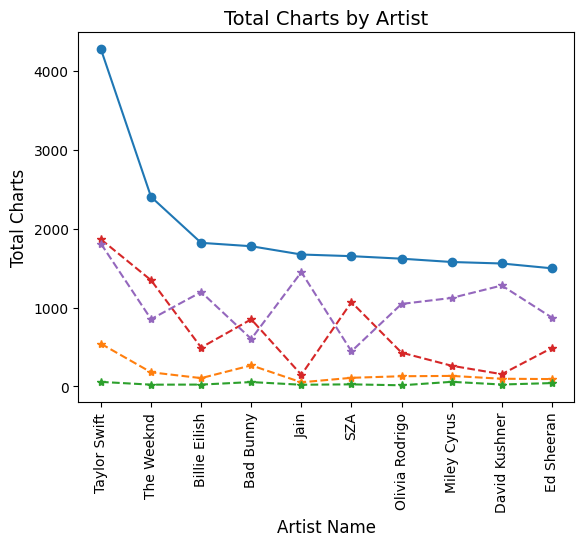

In [ ]:
sdf2=sdf.head(10)
plt.plot(sdf2.index, sdf2['total_charts'], marker='o')
plt.plot(sdf2.index, sdf2['in_spotify_charts'], '*--')
plt.plot(sdf2.index, sdf2['in_deezer_charts'],'*--')
plt.plot(sdf2.index, sdf2['in_apple_charts'], '*--')
plt.plot(sdf2.index, sdf2['in_shazam_charts'], '*--')
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Total Charts', fontsize=12)
plt.title('Total Charts by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#most charted artists in spotify
sdf.sort_values(by=['in_spotify_charts'], ascending=False).head(10)

,in_spotify_charts,in_deezer_charts,in_apple_charts,in_shazam_charts,total_charts
artist(s)_name,,,,,
Taylor Swift,542,58,1866,1811,4277
Bad Bunny,268,56,852,603,1779
Arctic Monkeys,190,6,340,101,637
Harry Styles,185,76,545,282,1088
The Weeknd,180,23,1348,854,2405
NewJeans,168,13,877,283,1341
Feid,165,17,303,20,505
Eminem,152,12,281,272,717
Karol G,149,33,316,412,910


In [38]:
spotify_2023 = spotify[spotify['released_year'] == 2023]
# Top 10 most streamed artists in 2023
spotify_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

,streams
artist(s)_name,
Miley Cyrus,1316855716
Morgan Wallen,946694010
"Eslabon Armado, Peso Pluma",725980112
"Shakira, Bizarrap",721975598
Jimin,705445695
Fifty Fifty,636477650
"Karol G, Shakira",618990393
"Peso Pluma, Yng Lvcas",553634067
NewJeans,518794821


In [40]:
#Top 10 most streamed songs released in 2023
spotify_2023.sort_values(['streams'], ascending=False).head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,C#,Major,71,65,68,6,0,3,7
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598,119,...,122,D,Minor,78,50,63,27,0,9,5
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393,115,...,180,E,Minor,72,61,63,67,0,9,28
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108,87,...,67,C#,Minor,53,50,53,23,0,44,7
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438,41,...,83,F#,Minor,57,56,72,23,0,27,5
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,120,B,Minor,78,76,59,43,0,34,3
160,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,436027885,19,...,138,G,Minor,78,89,83,10,0,12,5
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4


In [41]:
#Average bpm of songs released in 2023
spotify_2023['bpm'].mean()

124.06285714285714

In [34]:
#most streamed songs
s_top=spotify.sort_values('streams', ascending=False).head(20)
s_top.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


In [24]:
s_top['key'].value_counts()
#most streamed songs are mostly c# keyed

,count
key,
C#,6
A#,3
B,3
F#,2
G#,2
D,1
G,1
A,1
E,1


In [26]:
#correlation of numeric values of top 20 songs by streams
s_topcorr=s_top.corr(numeric_only=True)
s_topcorr

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,-0.121437,0.036450,-0.220390,0.284399,-0.038541,-0.073455,0.135226,0.067509,-0.001495,-0.203847,0.525061,0.108460,0.192991,-0.026182,-0.254091,-0.122363,-0.157378,0.055177,-0.054339
released_year,-0.121437,1.000000,0.137954,0.280807,0.030462,0.247480,0.155999,0.565893,0.355429,-0.170739,0.736209,-0.271057,0.250723,0.020524,0.237222,0.114172,-0.009401,-0.622714,0.110233,-0.070334
released_month,0.036450,0.137954,1.000000,0.083371,0.054463,0.185894,-0.032933,0.567608,0.276442,-0.399231,-0.098579,0.206894,0.147222,-0.366265,-0.095550,-0.015303,0.107213,-0.101001,-0.197576,0.043864
released_day,-0.220390,0.280807,0.083371,1.000000,0.174197,0.247500,-0.086393,0.381871,0.569374,-0.184355,0.407498,0.007415,0.346646,0.145675,0.291379,0.402978,-0.323844,-0.062188,0.045117,0.198362
in_spotify_playlists,0.284399,0.030462,0.054463,0.174197,1.000000,0.155866,0.641195,0.385080,0.398818,0.587247,0.090015,0.023945,0.235603,0.362491,0.163466,0.336531,-0.284755,-0.189709,0.148058,0.089893
in_spotify_charts,-0.038541,0.247480,0.185894,0.247500,0.155866,1.000000,0.109975,0.187441,0.575312,-0.289960,0.612497,0.166161,0.555980,-0.221919,0.078484,0.191123,-0.035072,0.167059,0.051252,0.057984
streams,-0.073455,0.155999,-0.032933,-0.086393,0.641195,0.109975,1.000000,0.192580,0.180073,0.732160,0.148257,-0.171074,0.166357,0.211233,0.268041,0.121414,0.069227,-0.227216,-0.258667,-0.067179
in_apple_playlists,0.135226,0.565893,0.567608,0.381871,0.385080,0.187441,0.192580,1.000000,0.676990,-0.152753,0.354598,-0.175855,0.346130,0.100087,0.144028,0.336728,-0.238834,-0.243378,0.061719,-0.098274
in_apple_charts,0.067509,0.355429,0.276442,0.569374,0.398818,0.575312,0.180073,0.676990,1.000000,-0.145725,0.505871,0.123551,0.442728,0.037262,0.087689,0.252880,-0.035439,-0.066917,0.153534,0.032659
in_deezer_playlists,-0.001495,-0.170739,-0.399231,-0.184355,0.587247,-0.289960,0.732160,-0.152753,-0.145725,1.000000,-0.197024,-0.087192,-0.035805,0.460878,0.304083,0.140438,0.018326,-0.158073,-0.034627,0.053485


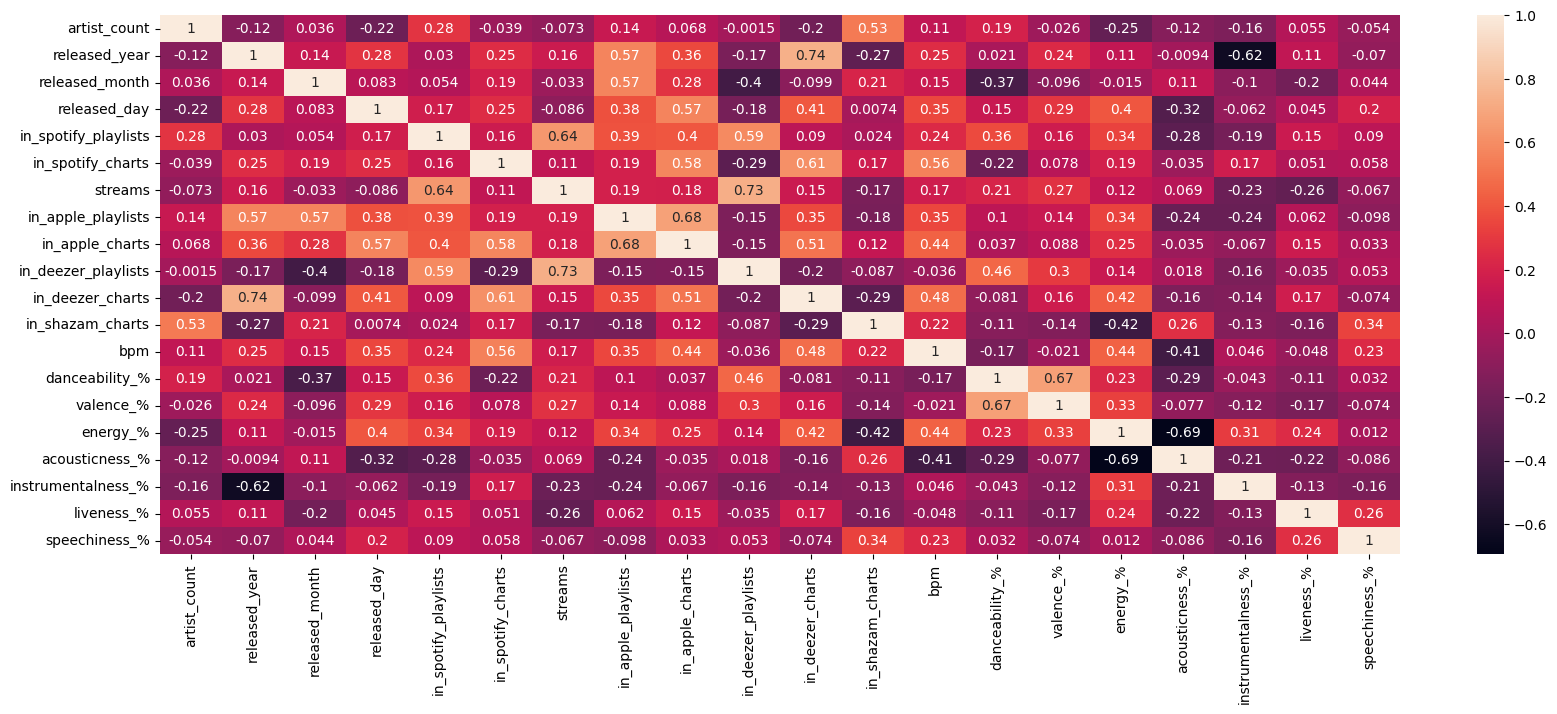

In [27]:
#top songs correlation heatmap
sns.heatmap(s_topcorr, annot=True)
plt.rcParams['figure.figsize']=(20,7)
plt.show()

In [ ]:
spotify.corr(numeric_only=True)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.135783,-0.051074,-0.088597,-0.071506,-0.003732,-0.012823,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.224273,-0.198998,-0.035842,-0.306812,0.095389,0.024640,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.023556,-0.000164,-0.019064,-0.088004,-0.005286,-0.088964,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.011921,0.026410,0.011086,-0.084558,0.073288,0.018552,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789725,0.708277,0.271317,0.826404,0.144342,0.057516,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.246251,0.233354,0.552232,0.088358,0.600205,0.569568,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.135783,-0.224273,-0.023556,0.011921,0.789725,0.246251,1.000000,0.772155,0.320896,0.598125,0.228897,-0.006086,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772155,1.000000,0.414523,0.472109,0.369032,0.100068,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320896,0.414523,1.000000,0.173542,0.383668,0.401411,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_playlists,-0.071506,-0.306812,-0.088004,-0.084558,0.826404,0.088358,0.598125,0.472109,0.173542,1.000000,0.066593,0.065846,-0.035395,-0.071489,-0.013859,0.064865,-0.063282,-0.016973,-0.026743,-0.062274


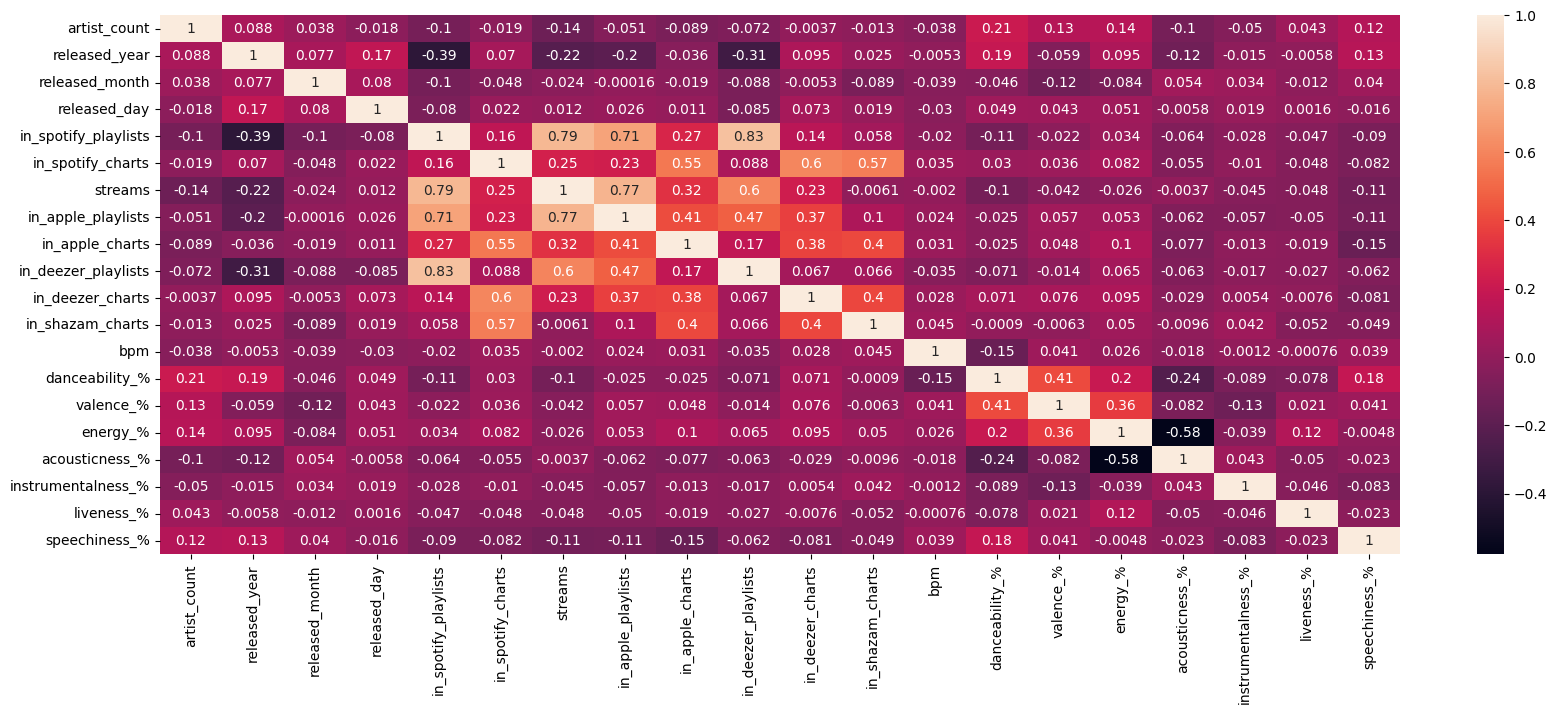

In [ ]:
sns.heatmap(spotify.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize']=(30,7)
plt.show()

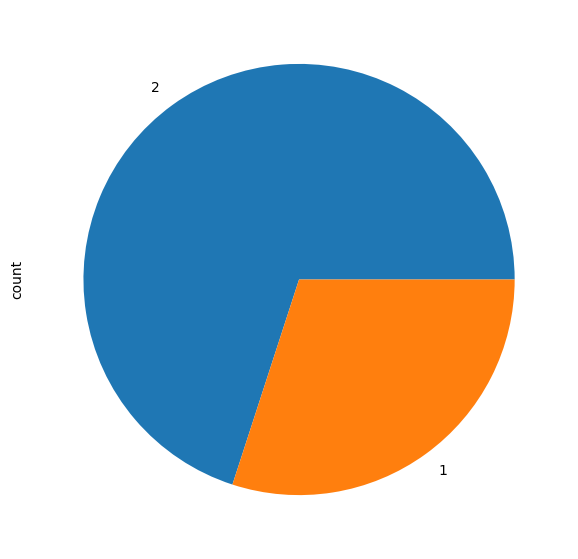

In [48]:
#comparison of number of atists colaborated in the top 10 songs of 2023
spotify_2023.sort_values(['streams'], ascending=False).head(10)['artist_count'].value_counts().plot(kind='pie')
plt.show()

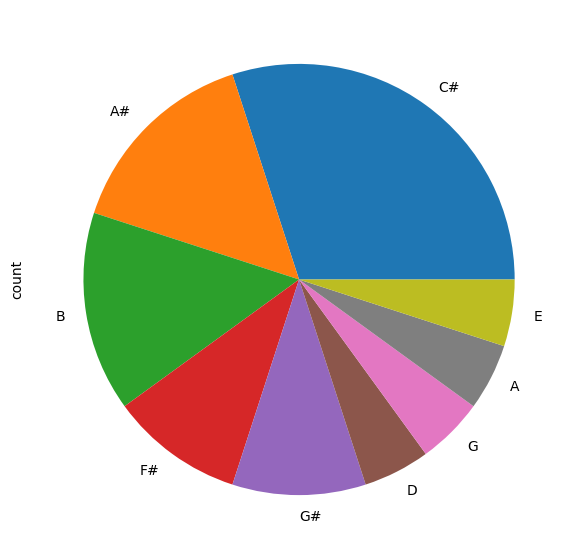

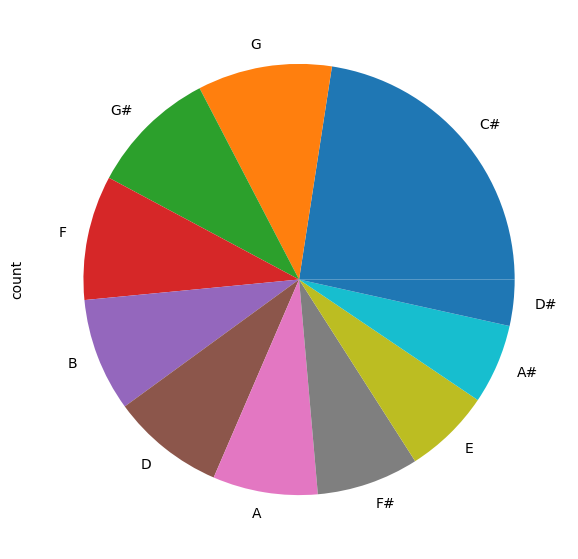

In [31]:
#pie chart comparision between the ratio of the type of keys used in the top 20 songs and the ratio of the type of keys used in the main dataframe.
s_top['key'].value_counts().plot(kind='pie')
plt.show()
spotify['key'].value_counts().plot(kind='pie')
plt.show()

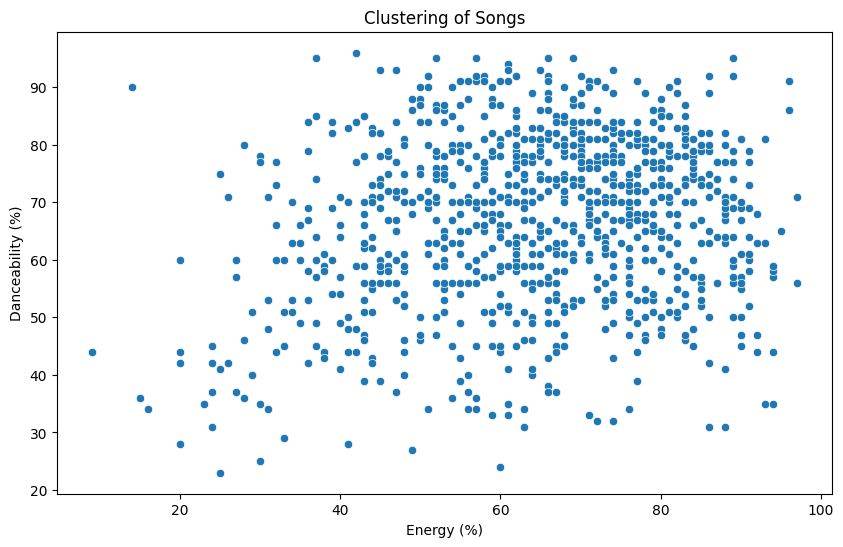

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_%', y='danceability_%', data=spotify)
plt.xlabel('Energy (%)')
plt.ylabel('Danceability (%)')
plt.title('Clustering of Songs')
plt.show()
#most dance songs are with high energy(positively correlated)

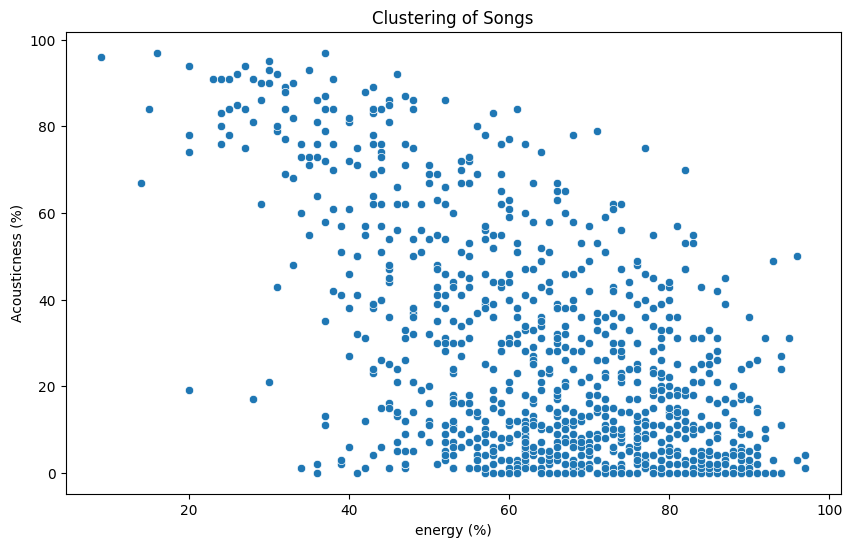

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_%', y='acousticness_%', data=spotify)
plt.xlabel('energy (%)')
plt.ylabel('Acousticness (%)')
plt.title('Clustering of Songs')
plt.show()
#most acoustic songs are with low energy(negatively correlated)

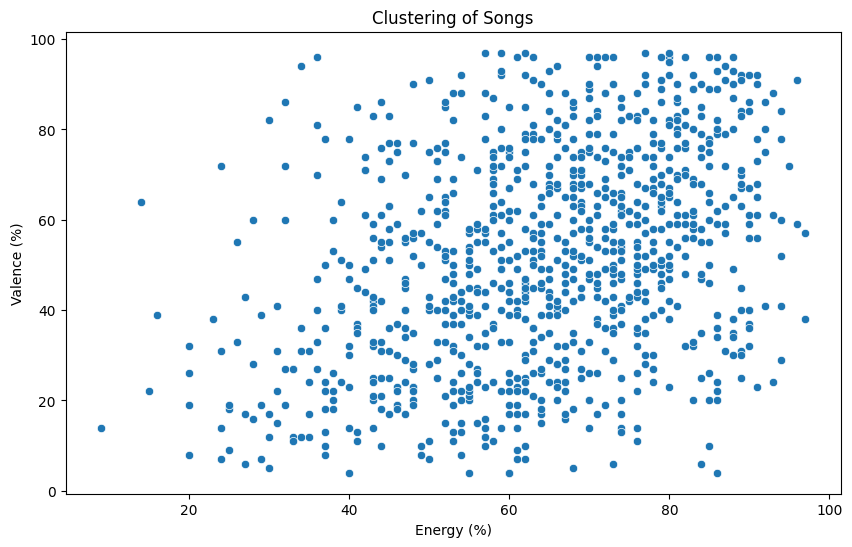

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_%', y='valence_%', data=spotify)
plt.xlabel('Energy (%)')
plt.ylabel('Valence (%)')
plt.title('Clustering of Songs')
plt.show()
#most happy songs are with high energy(positively correlated)

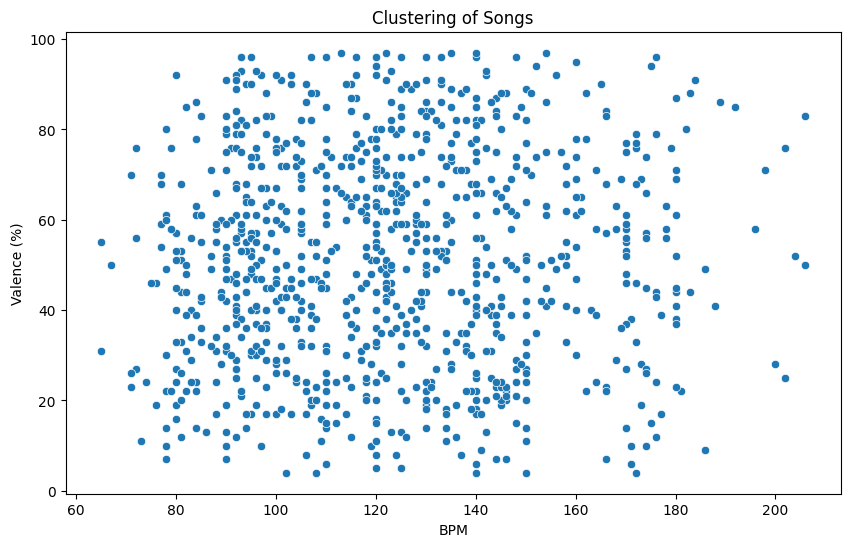

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='valence_%', data=spotify)
plt.xlabel('BPM')
plt.ylabel('Valence (%)')
plt.title('Clustering of Songs')
plt.show()
#no correlation


## **5. Conclusion**

### The analysis of the Spotify 2023 dataset reveals that songs with upbeat tempos were popular with average bpm of the songs released in 2023 being 124. High energy, and danceable rhythms were more likely to achieve popularity, streams and dominating charts. Additionally, it is found that songs released earlier in the year had a slight advantage with the most streamed song released in 2023 being released January. The success of collaborations between artists is highlighted as 7 out of the top 10 songs released in 2023 were colab songs. These findings suggest that artists and labels seeking success in the future should consider focusing on these trends and exploring creative collaborations.